In [177]:
import pandas as pd
data = pd.read_csv(r"C:\Users\najmu\Downloads\archive (1)\Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


### Data Preprocessing

In [178]:
#Cheack Missing Values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [179]:
data.dropna(inplace=True)
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [180]:
#Drop Unnecessary Columns
data.drop(["CustomerId","Surname"], axis = 1, inplace = True)
data

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [181]:
#convert categorical values to numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_cols = ["Gender","Geography"]
for col in categorical_cols:
    data[col]=encoder.fit_transform(data[col])
data

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,709,0,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,792,0,0,28.0,4,130142.79,1,1.0,0.0,38190.78,0


### SMOTE

In [182]:
from imblearn.over_sampling import SMOTE

X = data.drop("Exited",axis=1)
Y = data["Exited"]

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X,Y)

### Exploratory Data Analysis (EDA)

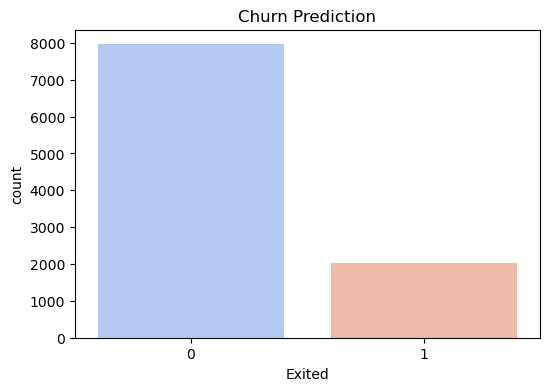

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Exited", data=data, hue="Exited", palette = "coolwarm", legend=False)
plt.title("Churn Prediction")
plt.show()

### Correlation Heatmap

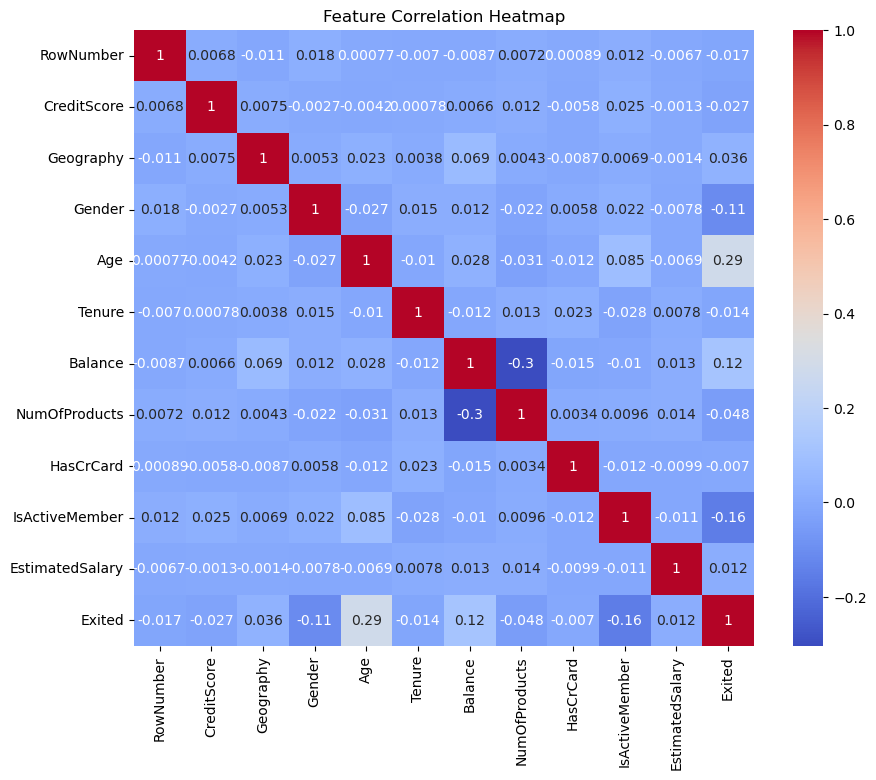

In [184]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Splitting Data

In [185]:
from sklearn.model_selection import train_test_split

X = data.drop("Exited",axis=1)
Y = data["Exited"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

### Train Machine Learning Model

In [186]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train) 

Y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test ,Y_pred):.2f}")
print(classification_report(Y_test, Y_pred))
#model.score(X_test, Y_test)

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1572
           1       0.43      0.06      0.11       428

    accuracy                           0.78      2000
   macro avg       0.61      0.52      0.49      2000
weighted avg       0.71      0.78      0.71      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(Y_test ,Y_pred_rf):.2f}")
print(classification_report(Y_test, Y_pred_rf))
#model.score(X_test, Y_test)

Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1572
           1       0.76      0.42      0.54       428

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.83      2000



### Model Comparison

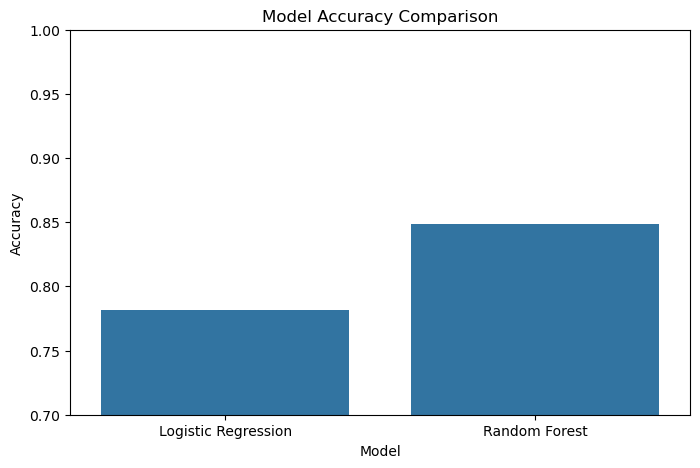

In [188]:
models = ["Logistic Regression","Random Forest"]
accuracies = [accuracy_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred_rf)]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7,1)
plt.show()

In [189]:
import pickle

#save best model
with open ("churn_model.pkl","wb")as files:
    pickle.dump(rf_model, files)

In [190]:
data.to_csv("churn_prediction_results.csv",index=False)